<a href="https://colab.research.google.com/github/samiha-mahin/WaterQuality/blob/main/WQ_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ Best MLP Model Accuracy: 0.634185303514377
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       386
           1       0.52      0.50      0.51       240

    accuracy                           0.63       626
   macro avg       0.61      0.61      0.61       626
weighted avg       0.63      0.63      0.63       626



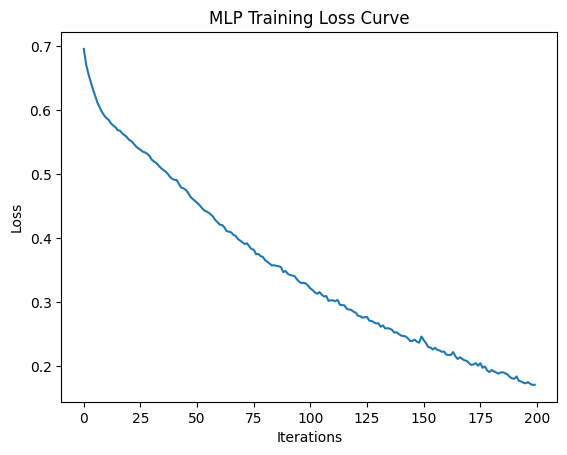

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Step 1: Load dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Feature Engineering (only useful ones)
df["Solids_per_Hardness"] = df["Solids"] / (df["Hardness"] + 1e-5)
df["pH_Turbidity"] = df["ph"] * df["Turbidity"]
df["Sulfate_Chloramines"] = df["Sulfate"] * df["Chloramines"]

# Step 3: Split features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Step 4: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 7: Faster GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,), (100, 50)],
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter': [200],
    'learning_rate': ['constant', 'adaptive'],
}

mlp_model = MLPClassifier(random_state=42)

grid_search = GridSearchCV(mlp_model, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(X_resampled, y_resampled)

# Step 8: Best model
best_mlp_model = grid_search.best_estimator_

# Step 9: Predict and evaluate
y_pred = best_mlp_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print("✅ Best MLP Model Accuracy:", accuracy)
print("📊 Classification Report:\n", report)

# Plot loss curve
plt.plot(best_mlp_model.loss_curve_)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5338 - loss: 0.7087 - val_accuracy: 0.5463 - val_loss: 0.6899
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5180 - loss: 0.6943 - val_accuracy: 0.5463 - val_loss: 0.6859
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5743 - loss: 0.6648 - val_accuracy: 0.5815 - val_loss: 0.6655
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5920 - loss: 0.6580 - val_accuracy: 0.6054 - val_loss: 0.6560
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5859 - loss: 0.6632 - val_accuracy: 0.6134 - val_loss: 0.6495
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5999 - loss: 0.6478 - val_accuracy: 0.5974 - val_loss: 0.6500
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6275 - loss: 0.6365 - val_accuracy: 0.6214 - val_loss: 0.6359
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6561 - loss: 0.6323 - val_accuracy: 0.6230 - val_loss:

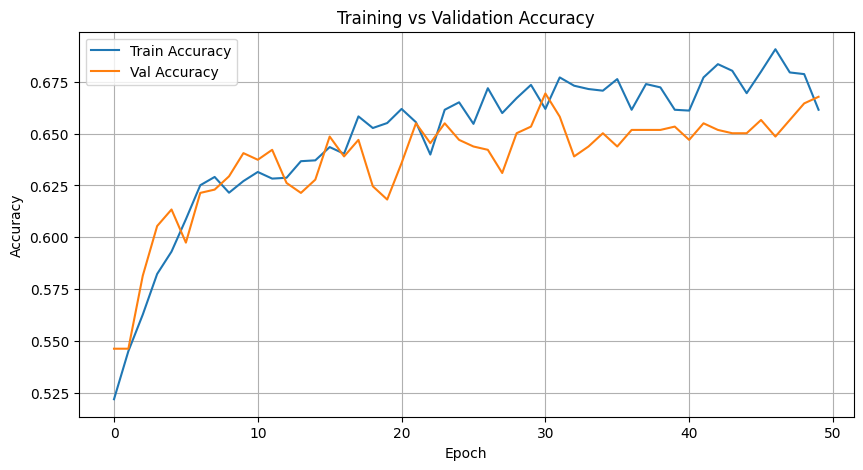

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load and engineer features
df = pd.read_csv("cleaned_data.csv")
df["Solids_per_Hardness"] = df["Solids"] / (df["Hardness"] + 1e-5)
df["pH_Turbidity"] = df["ph"] * df["Turbidity"]
df["Sulfate_Chloramines"] = df["Sulfate"] * df["Chloramines"]

# Step 2: Features and labels
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Step 3: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Compute class weights to address imbalance
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

# Step 6: Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Step 7: Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test_scaled, y_test),
                    class_weight=class_weight_dict,
                    verbose=1)

# Step 8: Evaluate
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
acc = accuracy_score(y_test, y_pred)

print("✅ Deep Learning Accuracy:", acc)
print("📊 Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
